<a href="https://colab.research.google.com/github/Kwonjihan/ML-teamproject/blob/developtemp/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Colab Notebooks/12K IMDB Dataset.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv(path)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,"Petter Mattei's ""Love in the Time of Money"" is...",positive
4,"Probably my all-time favorite movie, a story o...",positive


In [4]:
reviews=list(df['review'])
sentiments=list(df['sentiment'])
X_train, X_eval, y_train, y_eval = train_test_split(reviews, sentiments, test_size=0.2, random_state=42)

In [5]:
tfidf_vec=TfidfVectorizer(min_df=0.0, analyzer="char", sublinear_tf=True, ngram_range=(1,3), max_features=5000)
tfidf_vec.fit(X_train)
X_train_tfidf_vec = tfidf_vec.transform(X_train)
X_eval_tfidf_vec = tfidf_vec.transform(X_eval)

In [14]:
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train_tfidf_vec, y_train)
print('linearsvm:',svm_model.score(X_eval_tfidf_vec,y_eval))

linearsvm: 0.8670833333333333


In [15]:
y_pred= svm_model.predict(X_eval_tfidf_vec)

Text(0.5, -0.15, 'F1 Score: 0.8718 Precision: 0.8659 Recall: 0.8778')

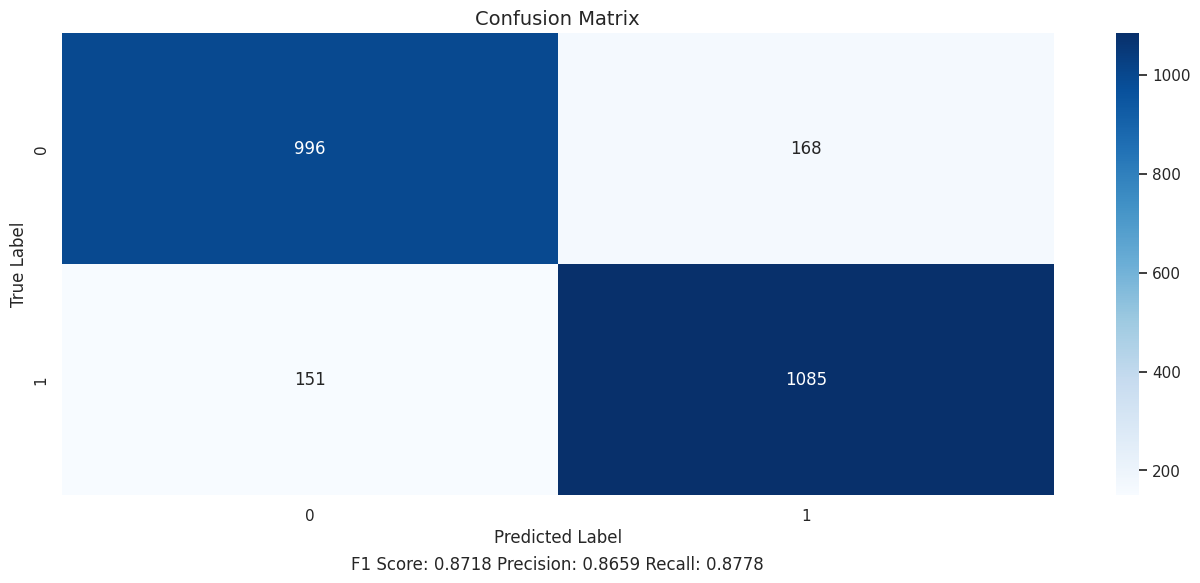

In [16]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
cm1 =confusion_matrix(y_eval,y_pred) #confusin matrix
f1_1 =f1_score(y_eval,y_pred,pos_label='positive') #f1score
precision_1 =precision_score(y_eval,y_pred,pos_label='positive')#precision
recall_1 =recall_score(y_eval,y_pred,pos_label='positive')#recall
fig, axes = plt.subplots(figsize=(16, 6))

# 첫 번째 subplot: baseline model
sns.heatmap(cm1, annot=True, cmap='Blues', fmt='d', ax=axes) #cm1 시각화
axes.set_title('Confusion Matrix', fontsize=14)
axes.set_xlabel('Predicted Label', fontsize=12)
axes.set_ylabel('True Label', fontsize=12)
axes.text(0.5, -0.15, f'F1 Score: {f1_1:.4f} Precision: {precision_1:.4f} Recall: {recall_1:.4f}',
             horizontalalignment='center', verticalalignment='center', transform=axes.transAxes,fontsize=12)

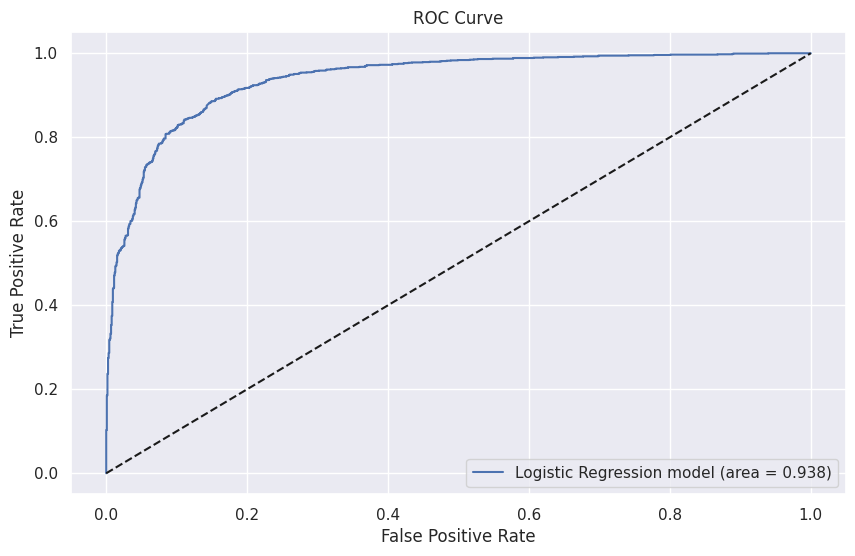

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score

lr_proba =svm_model.predict_proba(X_eval_tfidf_vec)[:, 1]#baseline의 예측확률을 계산
fp_lr, tp_lr,_ = roc_curve(y_eval, lr_proba,pos_label='positive')#roc curve를 계산
auroc_baseline = roc_auc_score(y_eval, lr_proba)#auroc를 계산

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(fp_lr, tp_lr, label=f'Logistic Regression model (area = {auroc_baseline:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()